In [1]:
# Uninstall and reinstall to ensure compatibility
!pip uninstall -y scikit-learn xgboost
!pip install scikit-learn>=1.5.0 xgboost>=2.0.0

# Import required libraries
import sklearn
import xgboost

# Verify versions
print(f"scikit-learn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: xgboost 2.0.3
Uninstalling xgboost-2.0.3:
  Successfully uninstalled xgboost-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
scikit-learn version: 1.6.1
xgboost version: 3.0.2


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, make_scorer, precision_recall_fscore_support,
                             roc_auc_score, roc_curve, classification_report)
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import io
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

dataset_save_path = "/kaggle/working/"
model_data_load_save_path = "/kaggle/working/"

In [3]:
import pandas as pd
df=pd.read_csv("/kaggle/input/final-external-egg-feature-generation/Merged_DenseNet169_Grade_2C_Egg_Image_Feature_Dataset.csv")
print(df.head())

         PC1        PC2        PC3        PC4       PC5        PC6        PC7  \
0   3.450862   2.233326  -0.373516  13.428391 -7.529239  10.973444  -3.057597   
1  17.084116 -19.319928  -6.378192  -6.381206 -5.210418   4.967380  -1.232495   
2 -19.578846   4.819403  -8.175842  -5.799032  2.346599  -3.548516  -4.120204   
3 -19.706953  15.560537 -16.196202 -11.068035 -7.949862  -5.651902  15.017329   
4  -4.580054 -18.171186   9.113176  -3.627440 -5.748062   4.621052  -6.775785   

        PC8        PC9      PC10  ...  Scaled1658  Scaled1659  Scaled1660  \
0 -4.440156   9.229073 -3.408324  ...    0.783502   -0.144272    3.418942   
1 -1.908487   4.601923 -2.349076  ...   -0.540767   -0.463061   -0.238041   
2 -8.353639   2.235050 -0.563791  ...    0.537623   -0.620661   -0.945910   
3  9.211978  -3.984473  6.860721  ...   -1.464890    1.866853   -0.055154   
4  1.336203 -10.187834 -2.096108  ...   -0.512965   -1.042165   -0.201739   

   Scaled1661  Scaled1662  Scaled1663  Scaled1664 

In [4]:
cols = [col for col in df.columns if col.startswith('Scaled')]
# cols = [col for col in df.columns if col.startswith('PC')]
# cols = [col for col in df.columns if col.startswith(('Scaled', 'PC'))]
print(cols)
X = df[cols].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['New_Egg_grade'].values)

['Scaled1', 'Scaled2', 'Scaled3', 'Scaled4', 'Scaled5', 'Scaled6', 'Scaled7', 'Scaled8', 'Scaled9', 'Scaled10', 'Scaled11', 'Scaled12', 'Scaled13', 'Scaled14', 'Scaled15', 'Scaled16', 'Scaled17', 'Scaled18', 'Scaled19', 'Scaled20', 'Scaled21', 'Scaled22', 'Scaled23', 'Scaled24', 'Scaled25', 'Scaled26', 'Scaled27', 'Scaled28', 'Scaled29', 'Scaled30', 'Scaled31', 'Scaled32', 'Scaled33', 'Scaled34', 'Scaled35', 'Scaled36', 'Scaled37', 'Scaled38', 'Scaled39', 'Scaled40', 'Scaled41', 'Scaled42', 'Scaled43', 'Scaled44', 'Scaled45', 'Scaled46', 'Scaled47', 'Scaled48', 'Scaled49', 'Scaled50', 'Scaled51', 'Scaled52', 'Scaled53', 'Scaled54', 'Scaled55', 'Scaled56', 'Scaled57', 'Scaled58', 'Scaled59', 'Scaled60', 'Scaled61', 'Scaled62', 'Scaled63', 'Scaled64', 'Scaled65', 'Scaled66', 'Scaled67', 'Scaled68', 'Scaled69', 'Scaled70', 'Scaled71', 'Scaled72', 'Scaled73', 'Scaled74', 'Scaled75', 'Scaled76', 'Scaled77', 'Scaled78', 'Scaled79', 'Scaled80', 'Scaled81', 'Scaled82', 'Scaled83', 'Scaled84', 

In [5]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=2000, random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': [None, 'balanced']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'class_weight': [None, 'balanced']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'class_weight': [None, 'balanced']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000, random_state=42),
        'params': {
            'hidden_layer_sizes': [(8,), (16,), (8, 16), (16, 32)],
            'activation': ['relu', 'tanh'],
            'learning_rate_init': [0.001, 0.01, 0.1],
            'alpha': [0.0001, 0.001],
            'solver': ['sgd', 'adam']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.001, 0.01, 0.1, 0.5],
            'max_depth': [2, 3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'reg_lambda': [0, 1],
            'min_child_weight': [1, 3, 5]
        }
    },
    'XGB_gbtree': {
        'model': XGBClassifier(booster='gbtree', use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [2, 3, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'LGBM_gbdt': {
        'model': LGBMClassifier(boosting_type='gbdt', verbose=-1, random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1],
            'max_depth': [2, 3, 5],
            'num_leaves': [5, 10, 15, 20],
            'subsample': [0.8, 1.0]
        }
    },
    'LGBM_rf': {
        'model': LGBMClassifier(boosting_type='rf', verbose=-1, bagging_freq=1, random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 3, 5],
            'num_leaves': [5, 10, 15, 20],
            'bagging_fraction': [0.5, 0.8],
            'feature_fraction': [0.5, 0.8]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
            'estimator': [DecisionTreeClassifier(max_depth=None,min_samples_split=10, criterion='gini', class_weight='balanced', random_state=42),
                          DecisionTreeClassifier(max_depth=10,min_samples_split=2, criterion='gini', class_weight='balanced', random_state=42),
                          RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_split=5, criterion='entropy', class_weight='balanced', random_state=42),
                          RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=5, criterion='entropy', class_weight='balanced', random_state=42)]
        }
    }
}

In [6]:
def c_matrix(y_test, y_pred):
    unique_classes = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(os.path.join(model_data_load_save_path, f'{model_name}_conf_matrix_.png'))
    plt.show()

Total samples: 216
Classes: ['High' 'Low']

Tuning LogisticRegression...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.67      0.84      0.75       108
           1       0.79      0.59      0.68       108

    accuracy                           0.72       216
   macro avg       0.73      0.72      0.71       216
weighted avg       0.73      0.72      0.71       216



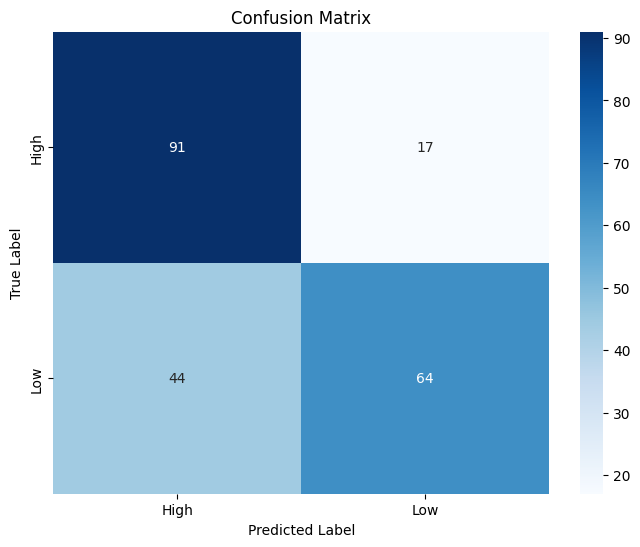


Predictions for best model (LogisticRegression) saved to 'LogisticRegression_fold_predictions.csv'

Tuning DecisionTree...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       108
           1       0.72      0.61      0.66       108

    accuracy                           0.69       216
   macro avg       0.69      0.69      0.68       216
weighted avg       0.69      0.69      0.68       216



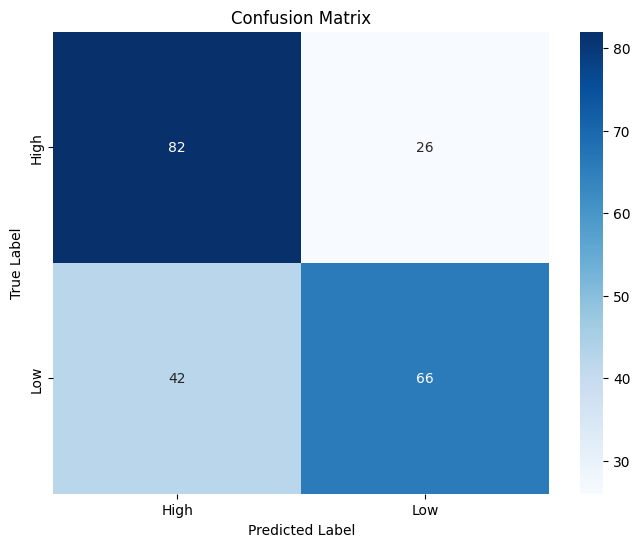


Predictions for best model (DecisionTree) saved to 'DecisionTree_fold_predictions.csv'

Tuning RandomForest...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       108
           1       0.79      0.75      0.77       108

    accuracy                           0.77       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.77      0.77      0.77       216



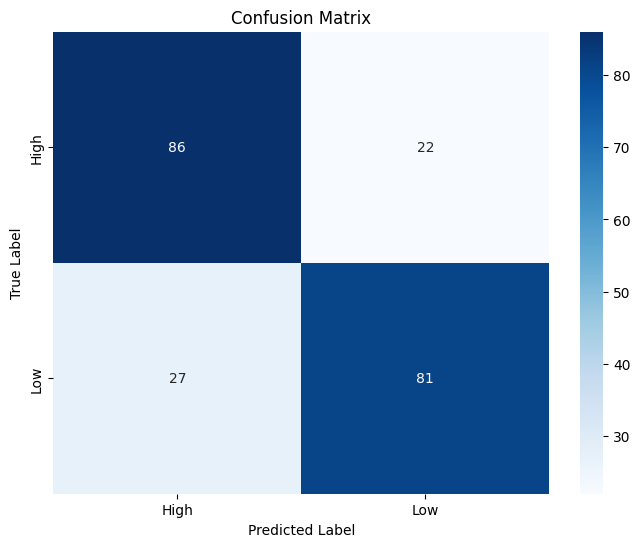


Predictions for best model (RandomForest) saved to 'RandomForest_fold_predictions.csv'

Tuning SVM...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       108
           1       0.79      0.75      0.77       108

    accuracy                           0.78       216
   macro avg       0.78      0.78      0.78       216
weighted avg       0.78      0.78      0.78       216



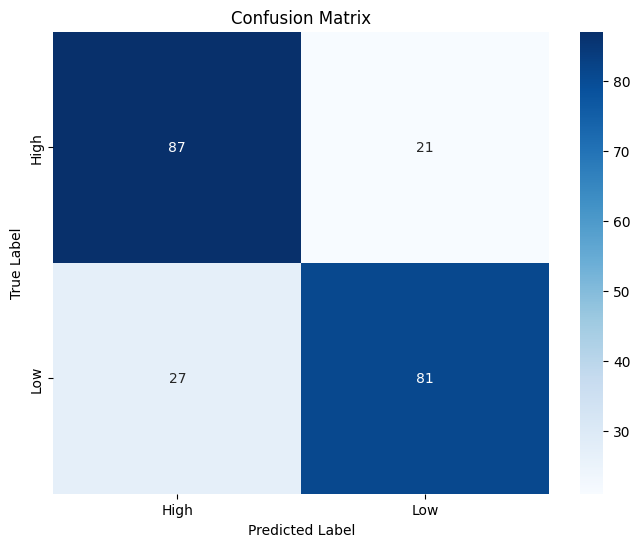


Predictions for best model (SVM) saved to 'SVM_fold_predictions.csv'

Tuning GradientBoosting...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       108
           1       0.77      0.65      0.70       108

    accuracy                           0.73       216
   macro avg       0.73      0.73      0.73       216
weighted avg       0.73      0.73      0.73       216



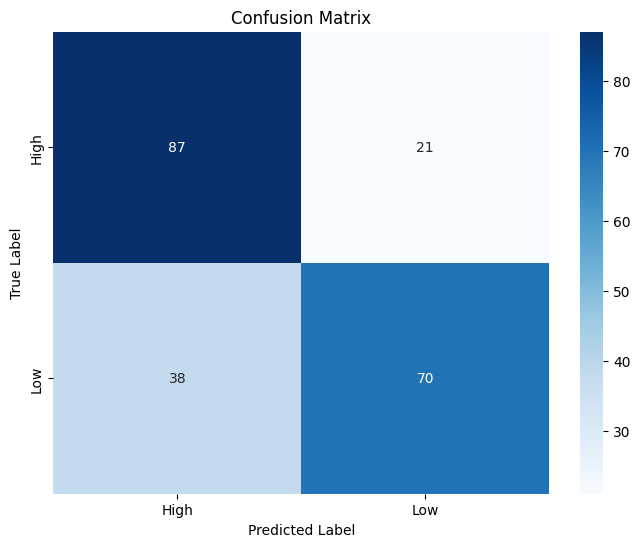


Predictions for best model (GradientBoosting) saved to 'GradientBoosting_fold_predictions.csv'

Tuning MLPClassifier...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       108
           1       0.79      0.73      0.76       108

    accuracy                           0.77       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.77      0.77      0.77       216



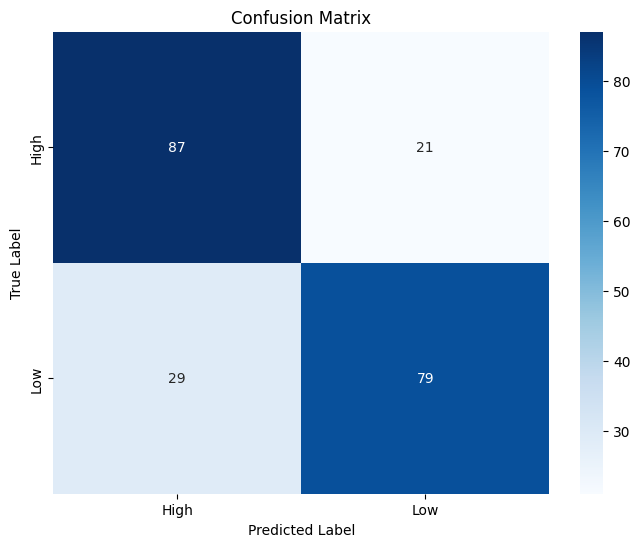


Predictions for best model (MLPClassifier) saved to 'MLPClassifier_fold_predictions.csv'

Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:39:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:39:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:39:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:39:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:39:06] WARNING: /w

Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       108
           1       0.81      0.73      0.77       108

    accuracy                           0.78       216
   macro avg       0.79      0.78      0.78       216
weighted avg       0.79      0.78      0.78       216



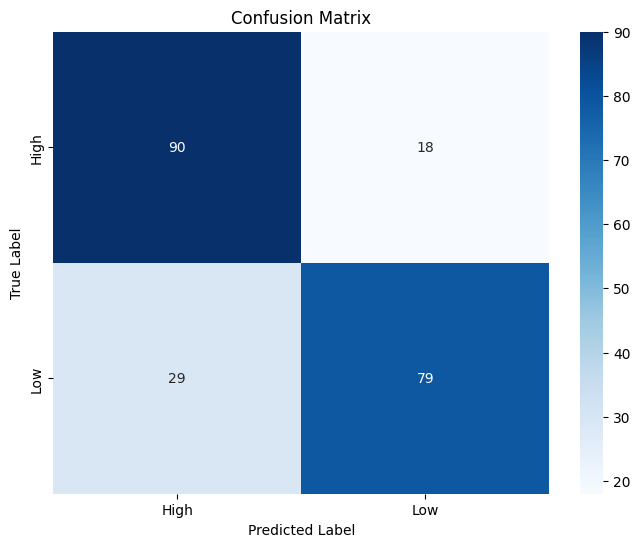


Predictions for best model (XGBoost) saved to 'XGBoost_fold_predictions.csv'

Tuning XGB_gbtree...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:39:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:39:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:39:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:39:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:39:19] WARNING: /w

Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       108
           1       0.78      0.72      0.75       108

    accuracy                           0.76       216
   macro avg       0.76      0.76      0.76       216
weighted avg       0.76      0.76      0.76       216



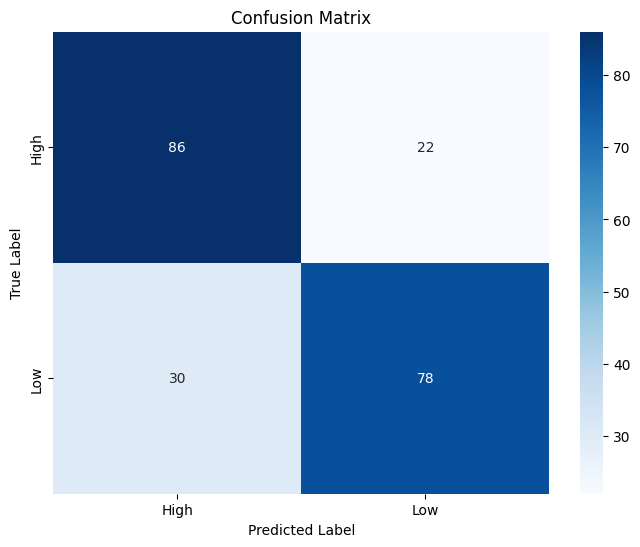


Predictions for best model (XGB_gbtree) saved to 'XGB_gbtree_fold_predictions.csv'

Tuning LGBM_gbdt...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       108
           1       0.76      0.72      0.74       108

    accuracy                           0.75       216
   macro avg       0.75      0.75      0.75       216
weighted avg       0.75      0.75      0.75       216



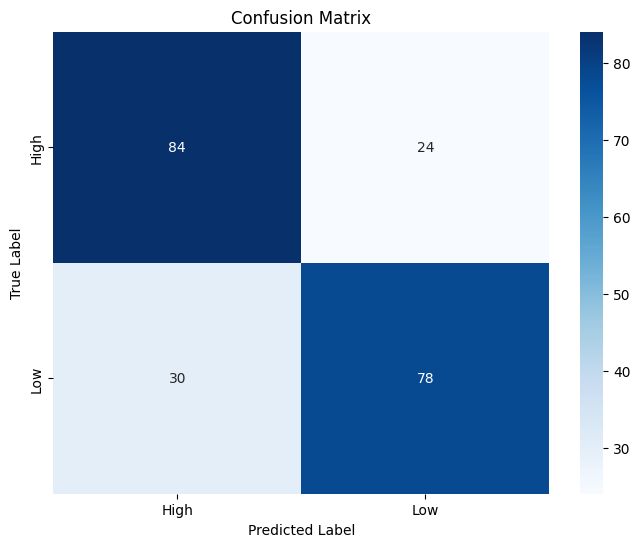


Predictions for best model (LGBM_gbdt) saved to 'LGBM_gbdt_fold_predictions.csv'

Tuning LGBM_rf...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       108
           1       0.71      0.75      0.73       108

    accuracy                           0.72       216
   macro avg       0.72      0.72      0.72       216
weighted avg       0.72      0.72      0.72       216



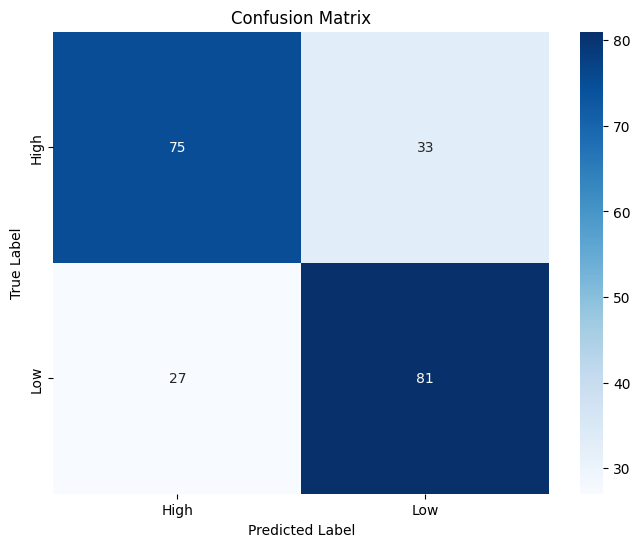


Predictions for best model (LGBM_rf) saved to 'LGBM_rf_fold_predictions.csv'

Tuning AdaBoost...
Classification Report (last fold):
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       108
           1       0.79      0.75      0.77       108

    accuracy                           0.77       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.77      0.77      0.77       216



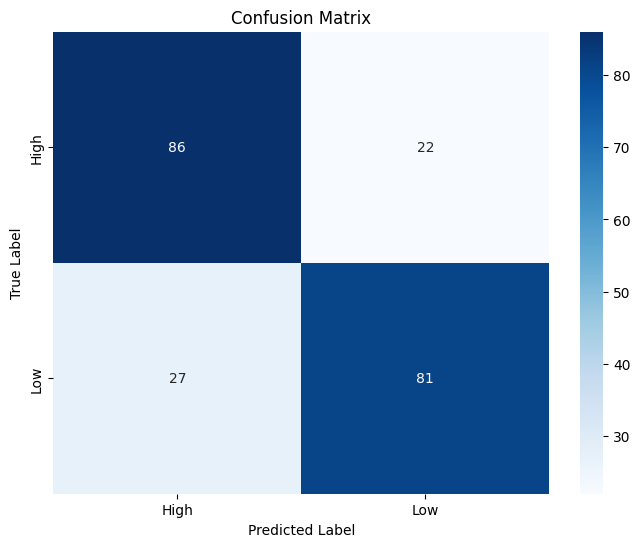


Predictions for best model (AdaBoost) saved to 'AdaBoost_fold_predictions.csv'

Metrics saved to 'model_performance_metrics.csv'

Model Performance Summary:

Best Model: XGBoost
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50, 'reg_lambda': 0, 'subsample': 1.0}
F1 Score: 0.7818
Accuracy: 0.7824
ROC AUC: 0.8278


In [7]:
# 2 Class

def perform_grid_search_2c_withCV(model_name, model, param_grid, X, y, cvld=10):
    print(f"\nTuning {model_name}...")
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro', zero_division=0),
        'recall': make_scorer(recall_score, average='macro', zero_division=0),
        'f1': make_scorer(f1_score, average='macro', zero_division=0),
        'roc_auc': 'roc_auc'
    }

    skf = StratifiedKFold(n_splits=cvld, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        refit='f1',
        cv=skf,
        n_jobs=-1,
        verbose=0,
        return_train_score=False)
    
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    cv_results = grid_search.cv_results_
    best_idx = grid_search.best_index_
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    mean_scores = {}
    ci_scores = {}

    y_true_all = []
    y_pred_all = []
    y_proba_all = []
    fold_numbers = []
    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        best_model.fit(X_train_fold, y_train_fold)
        y_pred = best_model.predict(X_test_fold)
        y_true_all.extend(y_test_fold)
        y_pred_all.extend(y_pred)
        fold_numbers.extend([fold_idx + 1] * len(y_test_fold))
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test_fold)[:, 1]  # Probability for class 1
            y_proba_all.extend(y_proba)
        else:
            y_proba_all.extend([None] * len(y_test_fold))

    report = classification_report(y_true_all, y_pred_all, output_dict=True)
    print("Classification Report (last fold):\n", classification_report(y_true_all, y_pred_all))
    c_matrix(y_true_all, y_pred_all)
    
    # ROC AUC (handle models without predict_proba, e.g., SVM might be slow)
    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    y_proba_all = np.array(y_proba_all)
    
    roc_auc = None
    roc_auc_per_class = {}
    fpr, tpr = {}, {}
    if y_proba_all is not None:
        roc_auc = roc_auc_score(y_true_all, y_proba_all)
        roc_auc_per_class[label_encoder.classes_[0]] = roc_auc_score(y_true_all == 0, y_proba_all)
        fpr[label_encoder.classes_[0]], tpr[label_encoder.classes_[0]], _ = roc_curve(y_true_all == 0, y_proba_all)
        roc_auc_per_class[label_encoder.classes_[1]] = roc_auc_score(y_true_all == 1, y_proba_all)
        fpr[label_encoder.classes_[1]], tpr[label_encoder.classes_[1]], _ = roc_curve(y_true_all == 1, y_proba_all)
    
    # Plot ROC Curve (only if probabilities are available)
    if y_proba_all is not None:
        plt.figure(figsize=(8, 6))
        for class_name in label_encoder.classes_:
            plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc_per_class[class_name]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(os.path.join(model_data_load_save_path, f'{model_name}_roc_curve.png'))
        plt.close()

    accuracy = accuracy_score(y_true_all, y_pred_all)
    precision = precision_score(y_true_all, y_pred_all, average='macro', zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, average='macro', zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, average='macro', zero_division=0)
    roc_auc = roc_auc_score(y_true_all, y_proba_all)

    predictions_df = pd.DataFrame({
        'True_Label': label_encoder.inverse_transform(y_true_all),
        'Predicted_Label': label_encoder.inverse_transform(y_pred_all),
        'Class_Probability': y_proba_all,
        'Fold_Number': fold_numbers
    })
    predictions_df.to_csv(os.path.join(model_data_load_save_path, f'{model_name}_fold_predictions.csv'), index=False)
    print(f"\nPredictions for best model ({model_name}) saved to '{model_name}_fold_predictions.csv'")

    return {
        'model_name': model_name,
        'best_params': best_params,
        'accuracy': accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "precision": precision,
        "recall": recall,
        'y_true_all': y_true_all,
        'y_pred_all': y_pred_all,
        'y_proba_all': y_proba_all,
        'roc_auc_per_class': roc_auc_per_class,
    }

print(f"Total samples: {len(X)}")
print(f"Classes: {label_encoder.classes_}")

results = []
for model_name, model_info in models.items():
    result = perform_grid_search_2c_withCV(
        model_name, model_info['model'], model_info['params'], X, y
    )
    results.append(result)

# Save Metrics to CSV
metrics_df = []
for res in results:
    row = {
        'Model': res['model_name'],
        'Best Params': str(res['best_params']),
        'Accuracy': f"{res['accuracy']:.4f}",
        'F1 Score': f"{res['f1_score']:.4f}",
        'Precision': f"{res['precision']:.4f}",
        'Recall': f"{res['recall']:.4f}",
        'ROC AUC': res['roc_auc'] if res['roc_auc'] is not None else 'N/A',
    }
    for class_name, auc_score in res['roc_auc_per_class'].items():
        row[f'ROC AUC ({class_name})'] = auc_score
    metrics_df.append(row)

metrics_df = pd.DataFrame(metrics_df)
metrics_df.to_csv(os.path.join(model_data_load_save_path, 'model_performance_metrics.csv'), index=False)
print("\nMetrics saved to 'model_performance_metrics.csv'")

# Print Summary
print("\nModel Performance Summary:")
best_result = max(results, key=lambda x: x['f1_score'])
print(f"\nBest Model: {best_result['model_name']}")
print(f"Best Parameters: {best_result['best_params']}")
print(f"F1 Score: {best_result['f1_score']:.4f}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"ROC AUC: {best_result['roc_auc']:.4f}")